# Load Models & Modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# # Future print function
# from __future__ import print_function

# # Load modules/models from EVA course
# !git clone https://github.com/sujitojha1/ERA1 -q --quiet
# !mv ERA1/Session10/*.py .
# !rm -rf ERA1
# print("Loaded Modules and Models")

# # Installing latest Albumentation library
# !pip install -U git+https://github.com/albu/albumentations -q --quiet

# # For inline matplotlib plotting
# %matplotlib inline

# Loading train and test data with transforms and loader functions

In [3]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=512)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


100%|██████████| 170498071/170498071 [00:05<00:00, 29492087.30it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


In [4]:
len(trainloader),len(testloader)

(98, 20)

In [5]:
98*512, 20*512

(50176, 10240)

In [6]:
50176+10240

60416

# Exploratory Data Analysis

## Summary Statistics

In [7]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


## Plotting sample images

Files already downloaded and verified


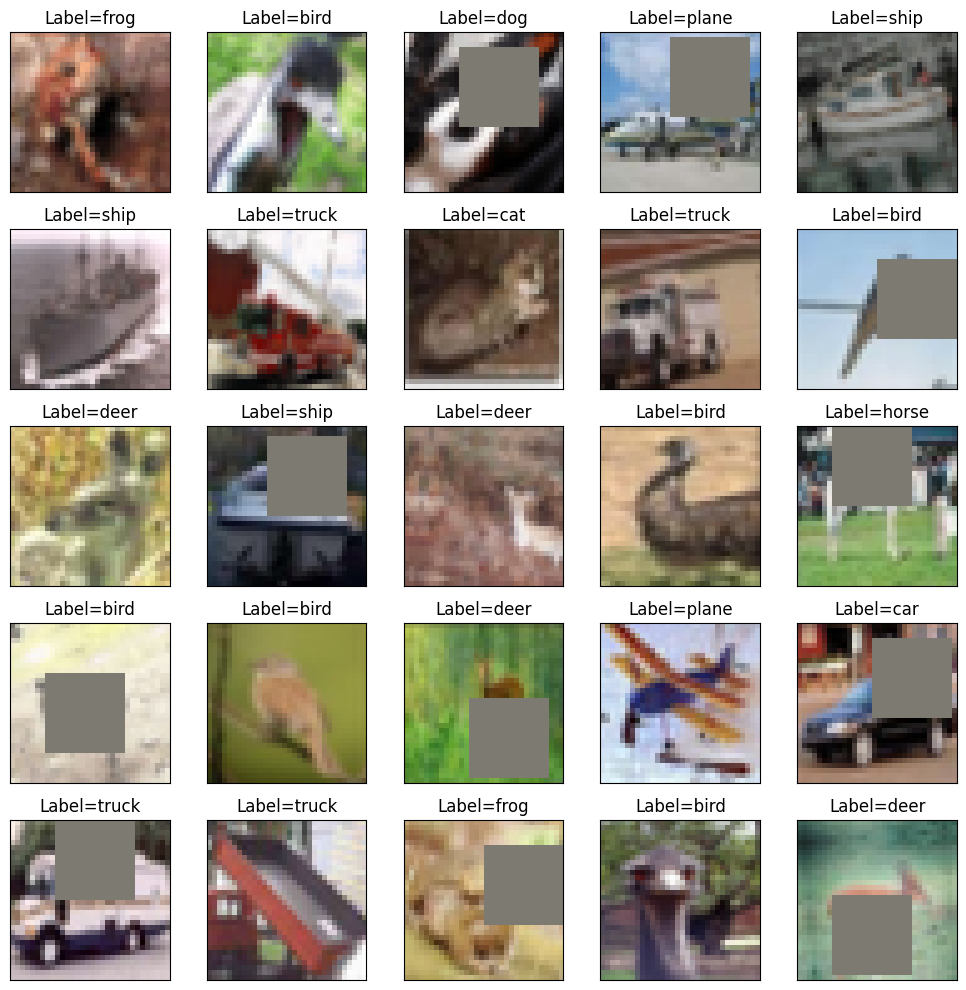

In [8]:
cifar10.sample_pictures(train_flag=True)

## Model

In [9]:
from model import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary

In [10]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
                 X-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

## Define a Loss function and optimizer

In [11]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1) #, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(trainloader),
                                                epochs=24,pct_start=500/2400,
                                                anneal_strategy='linear')

## Training & Testing

Epoch: 0,Loss=1.20 Batch_id=97 Accuracy=47.30: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]


Test set: Average loss: 0.0024, Accuracy: 5805/10000 (58.05%)



Epoch: 1,Loss=0.94 Batch_id=97 Accuracy=60.95: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]


Test set: Average loss: 0.0023, Accuracy: 6490/10000 (64.90%)



Epoch: 2,Loss=1.30 Batch_id=97 Accuracy=64.78: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]


Test set: Average loss: 0.0025, Accuracy: 6072/10000 (60.72%)



Epoch: 3,Loss=0.98 Batch_id=97 Accuracy=68.02: 100%|██████████| 98/98 [00:20<00:00,  4.67it/s]


Test set: Average loss: 0.0015, Accuracy: 7404/10000 (74.04%)



Epoch: 4,Loss=0.92 Batch_id=97 Accuracy=67.30: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]


Test set: Average loss: 0.0021, Accuracy: 6805/10000 (68.05%)



Epoch: 5,Loss=0.76 Batch_id=97 Accuracy=74.00: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


Test set: Average loss: 0.0011, Accuracy: 8114/10000 (81.14%)



Epoch: 6,Loss=0.72 Batch_id=97 Accuracy=77.97: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


Test set: Average loss: 0.0011, Accuracy: 8210/10000 (82.10%)



Epoch: 7,Loss=0.56 Batch_id=97 Accuracy=80.25: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0010, Accuracy: 8297/10000 (82.97%)



Epoch: 8,Loss=0.60 Batch_id=97 Accuracy=81.09: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]


Test set: Average loss: 0.0009, Accuracy: 8421/10000 (84.21%)



Epoch: 9,Loss=0.45 Batch_id=97 Accuracy=82.49: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]


Test set: Average loss: 0.0009, Accuracy: 8515/10000 (85.15%)



Epoch: 10,Loss=0.39 Batch_id=97 Accuracy=83.84: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]


Test set: Average loss: 0.0008, Accuracy: 8721/10000 (87.21%)



Epoch: 11,Loss=0.39 Batch_id=97 Accuracy=84.83: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]


Test set: Average loss: 0.0008, Accuracy: 8752/10000 (87.52%)



Epoch: 12,Loss=0.37 Batch_id=97 Accuracy=86.15: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


Test set: Average loss: 0.0007, Accuracy: 8841/10000 (88.41%)



Epoch: 13,Loss=0.39 Batch_id=97 Accuracy=87.09: 100%|██████████| 98/98 [00:21<00:00,  4.57it/s]


Test set: Average loss: 0.0008, Accuracy: 8655/10000 (86.55%)



Epoch: 14,Loss=0.37 Batch_id=97 Accuracy=87.90: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]


Test set: Average loss: 0.0006, Accuracy: 8927/10000 (89.27%)



Epoch: 15,Loss=0.32 Batch_id=97 Accuracy=88.39: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]


Test set: Average loss: 0.0007, Accuracy: 8914/10000 (89.14%)



Epoch: 16,Loss=0.42 Batch_id=97 Accuracy=89.39: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]


Test set: Average loss: 0.0006, Accuracy: 8999/10000 (89.99%)



Epoch: 17,Loss=0.28 Batch_id=97 Accuracy=90.05: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


Test set: Average loss: 0.0006, Accuracy: 9066/10000 (90.66%)



Epoch: 18,Loss=0.34 Batch_id=97 Accuracy=90.75: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


Test set: Average loss: 0.0006, Accuracy: 9017/10000 (90.17%)



Epoch: 19,Loss=0.20 Batch_id=97 Accuracy=91.47: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]


Test set: Average loss: 0.0006, Accuracy: 9106/10000 (91.06%)



Epoch: 20,Loss=0.29 Batch_id=97 Accuracy=91.96: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]


Test set: Average loss: 0.0005, Accuracy: 9138/10000 (91.38%)



Epoch: 21,Loss=0.24 Batch_id=97 Accuracy=92.79: 100%|██████████| 98/98 [00:22<00:00,  4.39it/s]


Test set: Average loss: 0.0005, Accuracy: 9166/10000 (91.66%)



Epoch: 22,Loss=0.18 Batch_id=97 Accuracy=93.37: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]


Test set: Average loss: 0.0005, Accuracy: 9166/10000 (91.66%)



Epoch: 23,Loss=0.19 Batch_id=97 Accuracy=93.57: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


Test set: Average loss: 0.0005, Accuracy: 9181/10000 (91.81%)

Finished Training


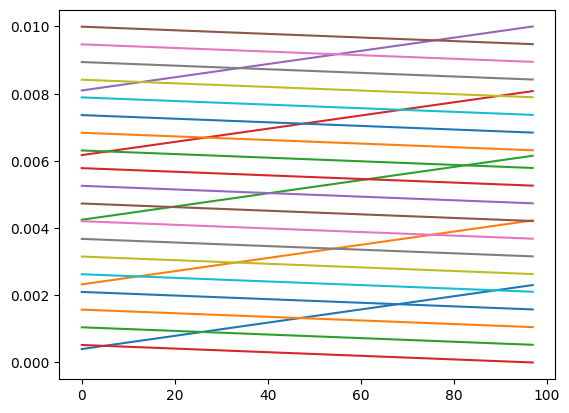

In [12]:
# Load train and test model
from main_new import *

train = train()
test = test()

EPOCHS= 24

for epoch in range(EPOCHS):  # loop over the dataset multiple times
  #train.execute(net, device, batch, optimizer, criterion, epoch)
  train.execute(net, device, trainloader, optimizer, scheduler, criterion, epoch)
  test.execute(net, device, testloader, criterion)

print('Finished Training')

## Display an image from the test set

Files already downloaded and verified


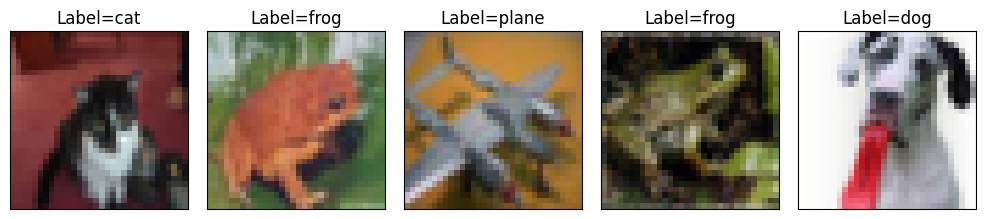

In [13]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [14]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:    cat  frog plane  frog   dog


## Evaluating Training Accuracy

In [ ]:
from evaluate import *
calAccuracy(net, trainloader, device)

## Evaluating Test Accuracy

In [ ]:
calAccuracy(net, testloader, device)

## Evaluating test Accuracy over different classes

In [ ]:
calClassAccuracy(net, testloader,classes, device)

## Misclassified Images

In [ ]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)